# Importamos las librerías

In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime

# Análisis de la primera planta de generación de energía

In [23]:
data= pd.read_csv("../data/dataset_completo.csv")

In [24]:
def compute_day(dataframe):
    date=datetime.datetime(year=dataframe["Year"].astype("int"), month=dataframe["Month"].astype("int"), day=dataframe["Day"].astype("int"), hour=dataframe["Hour"].astype("int"))
    return date
data.insert(loc=0, column="Date", value= data.apply(func=compute_day, axis=1))

<Axes: xlabel='Date', ylabel='Global Horizontal UV Irradiance (280-400nm)'>

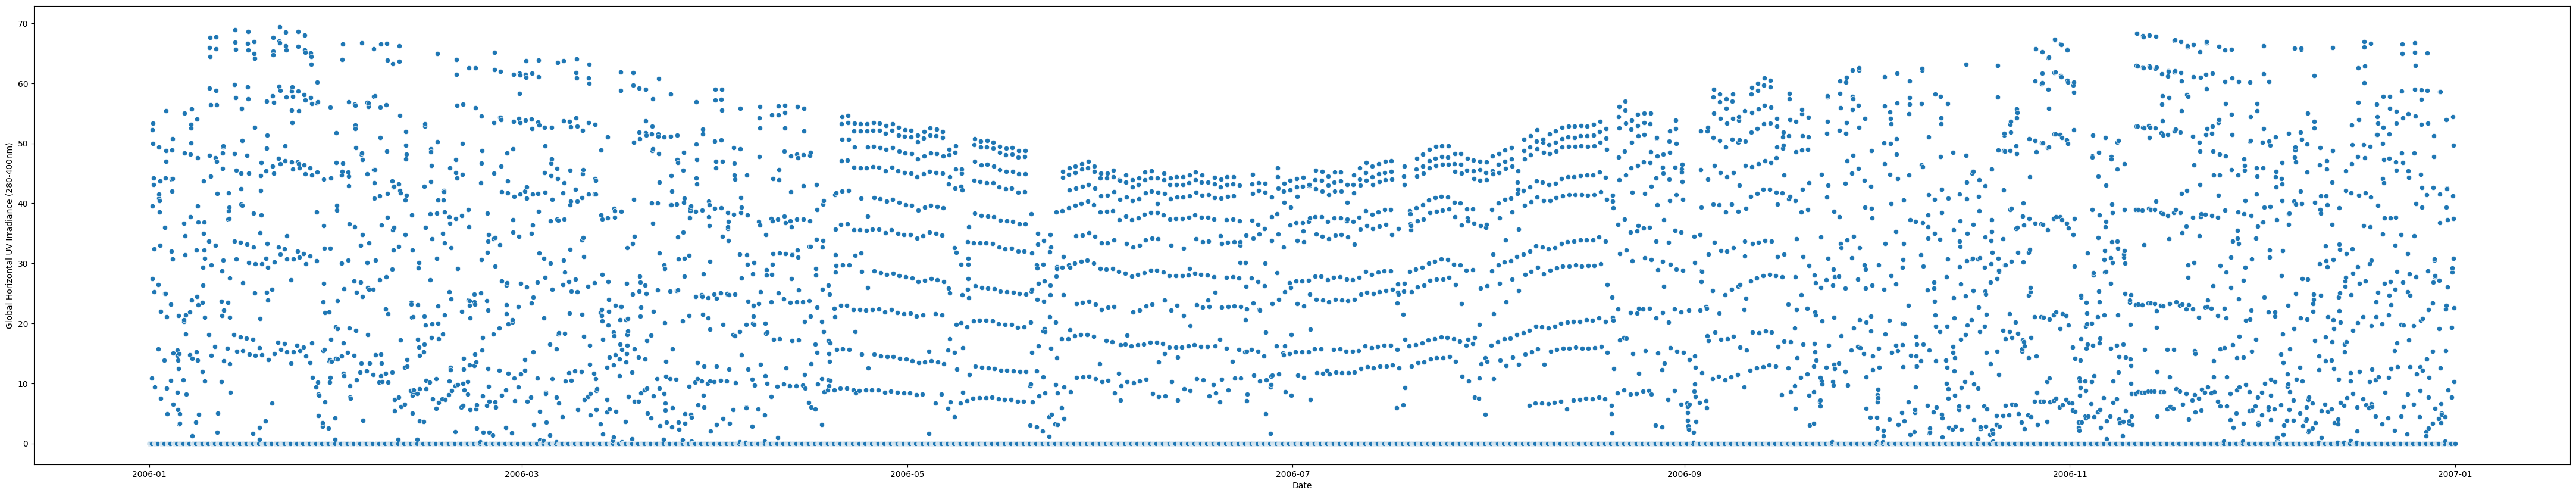

In [41]:
plt.figure(figsize=(55,10))
sns.scatterplot(data, x="Date", y="Global Horizontal UV Irradiance (280-400nm)" )

In [6]:
promedio_dia=data.groupby(["Year","Month", "Day"])["Global Horizontal UV Irradiance (295-385nm)"].mean().reset_index()
promedio_dia["Fecha"]=pd.to_datetime(promedio_dia[["Year", "Month", "Day"]])
promedio_dia


,Year,Month,Day,Global Horizontal UV Irradiance (295-385nm),Fecha
0,2006,1,1,12.693471,2006-01-01
1,2006,1,2,11.750413,2006-01-02
2,2006,1,3,10.819679,2006-01-03
3,2006,1,4,11.390012,2006-01-04
4,2006,1,5,3.873429,2006-01-05
...,...,...,...,...,...
360,2006,12,27,10.090462,2006-12-27
361,2006,12,28,10.912225,2006-12-28
362,2006,12,29,9.110958,2006-12-29
363,2006,12,30,10.345167,2006-12-30


<Axes: xlabel='Fecha', ylabel='Global Horizontal UV Irradiance (295-385nm)'>

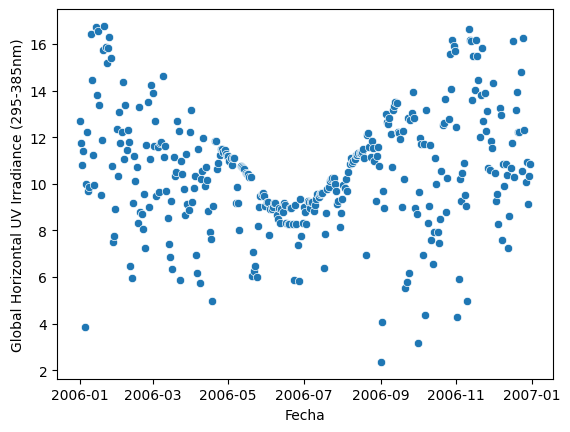

In [7]:
sns.scatterplot(promedio_dia, x="Fecha", y="Global Horizontal UV Irradiance (295-385nm)")

In [11]:
#data.describe().to_csv("../data/estadistica_raw.csv")

Las columnas de este Dataset son las siguientes:
1. DATE_TIME: Las observaciones se realizan cada 15 minutos
2. DV_POWER: Cantidad de energía DC generada por el inversor en el intervalo de 15 minutos
3. AC_POWER: Cantidad de energía generada por el inversor en el intervalo de 15 minutos
4. DAYLY_YIELD: Suma cumulativa de energía generada en el día hasta el punto en que está siendo registrada

# Análisis exploratorio

En este parte del análisis vamos a realizar una comparación de las variables más imnportantes del proceso

In [4]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Power(MW)', 'Minute', 'Temperature',
       'Clearsky GHI', 'DHI', 'Clearsky DHI', 'Clearsky DNI', 'Cloud Type',
       'DNI', 'Relative Humidity', 'Pressure', 'Wind Speed',
       'Global Horizontal UV Irradiance (295-385nm)',
       'Global Horizontal UV Irradiance (280-400nm)', 'Solar Zenith Angle',
       'Dew Point', 'Surface Albedo'],
      dtype='object')

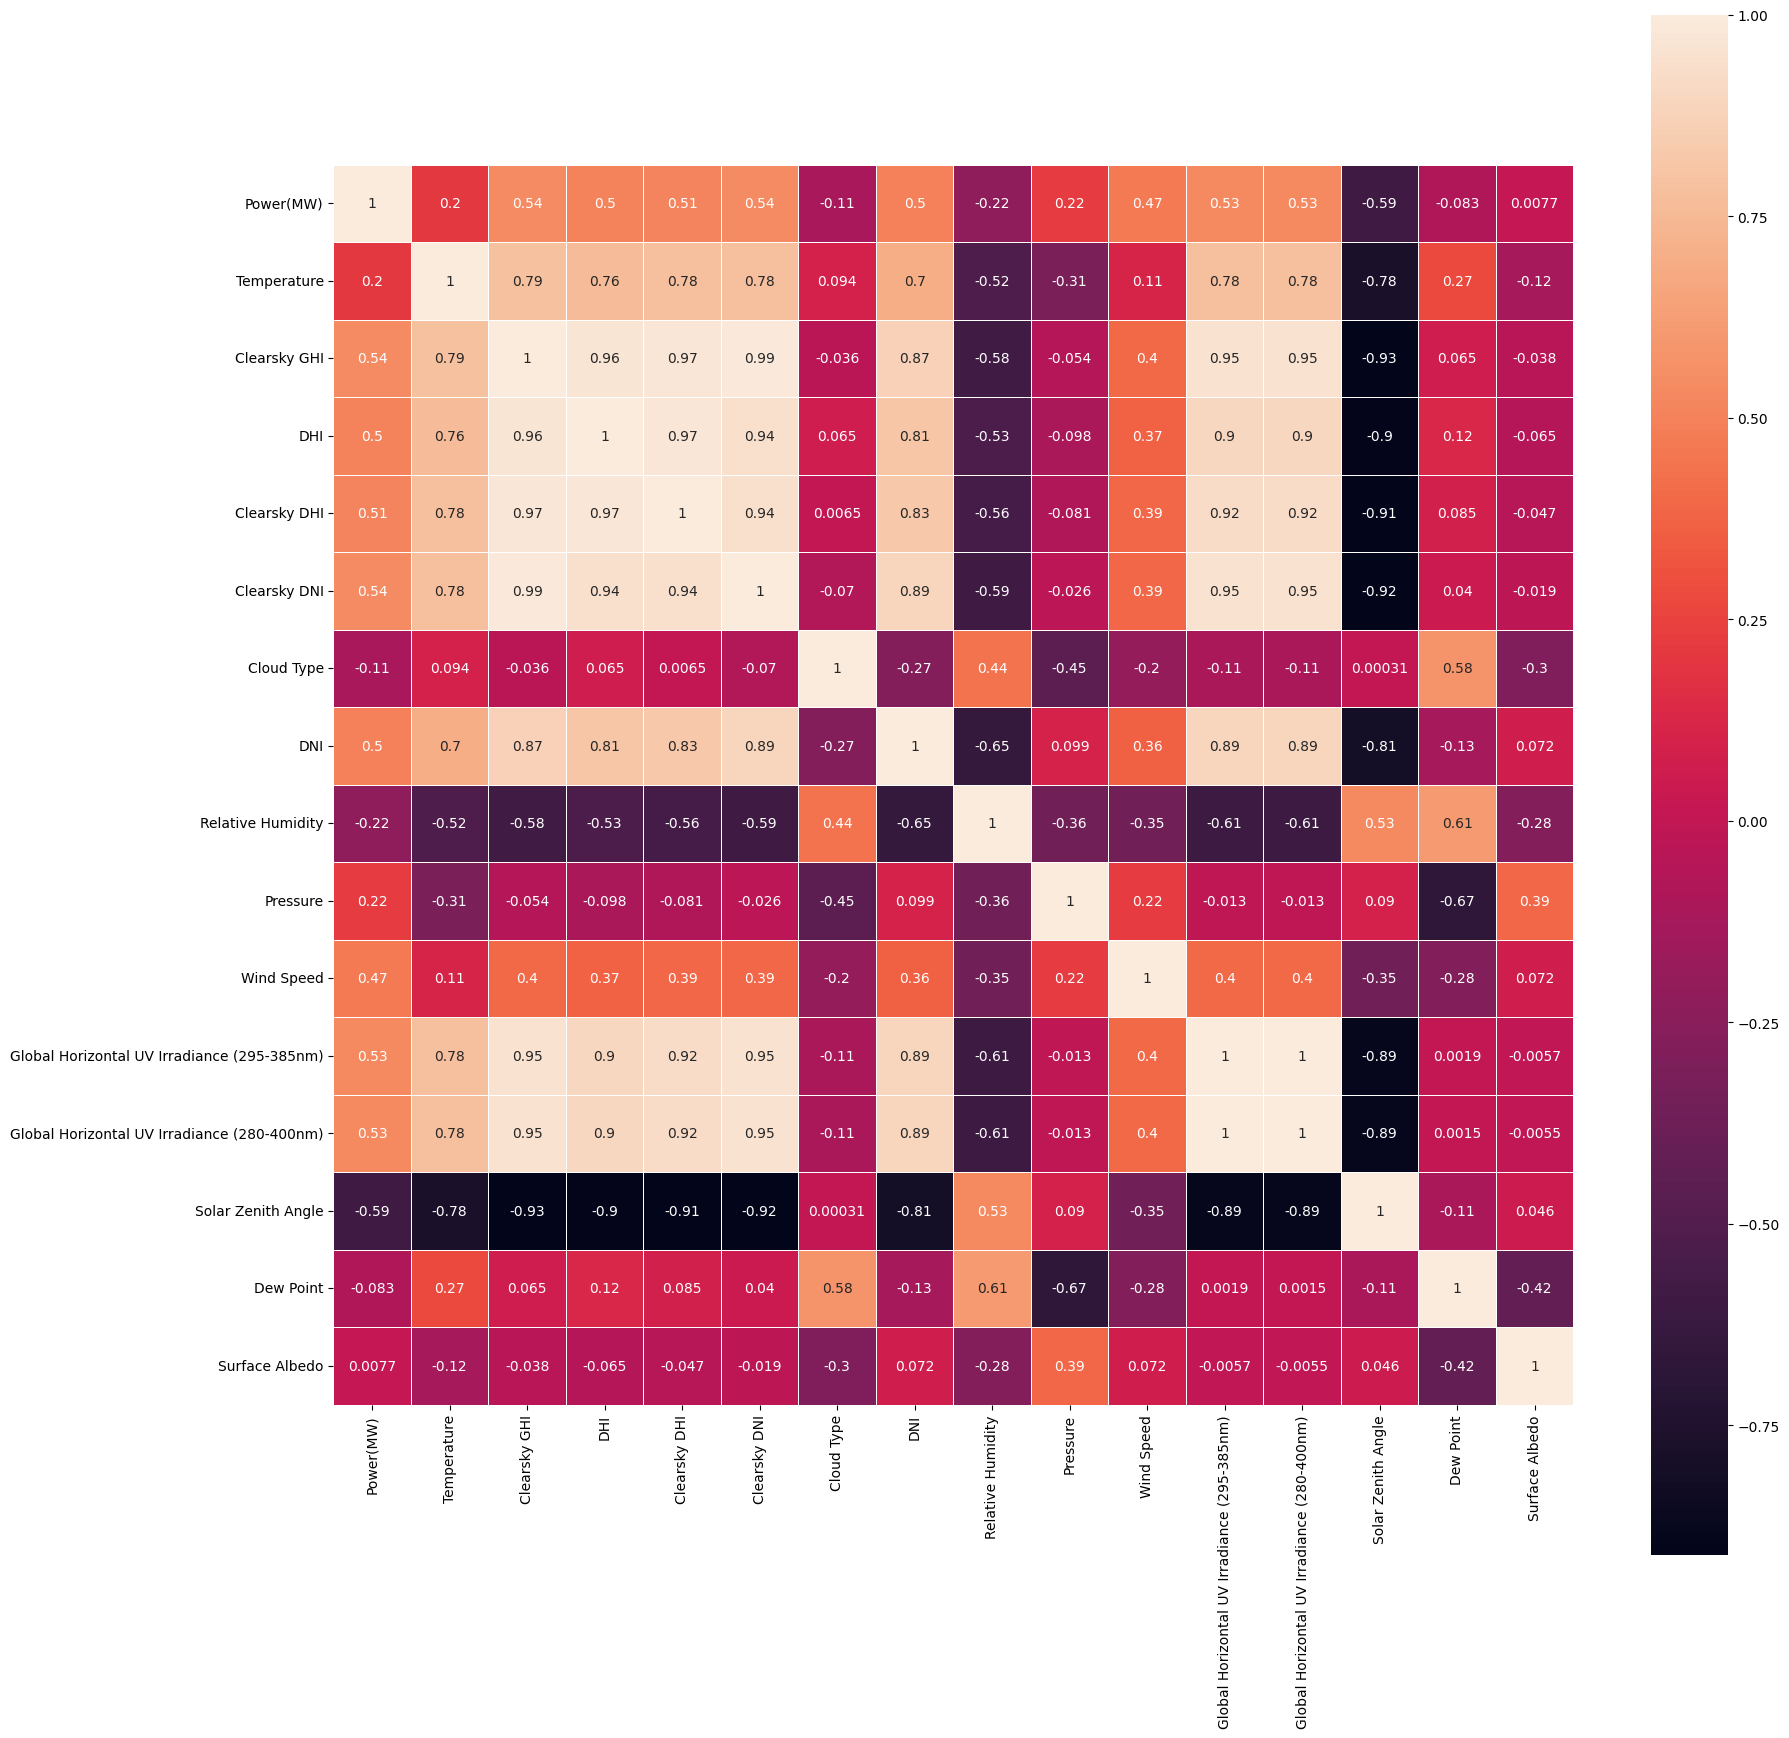

In [5]:
corr = data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute']).corr(method = 'spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, robust=True, annot=True, linewidths=.5, square=True)
plt.show()


En el mapa de correlaciones se puede obervar que existe una alta correlación entre el únto de rocío y ka temperatura del ambiente. Al igual que hay una correlación entre el altímetro y la presión 

Análisis entre la hora del día y la generación de energía

In [6]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Power(MW)', 'Minute', 'Temperature',
       'Clearsky GHI', 'DHI', 'Clearsky DHI', 'Clearsky DNI', 'Cloud Type',
       'DNI', 'Relative Humidity', 'Pressure', 'Wind Speed',
       'Global Horizontal UV Irradiance (295-385nm)',
       'Global Horizontal UV Irradiance (280-400nm)', 'Solar Zenith Angle',
       'Dew Point', 'Surface Albedo'],
      dtype='object')

In [43]:
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean().reset_index()

/tmp/ipykernel_650/3976693828.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")


Text(0.5, 0, 'Hora del día')

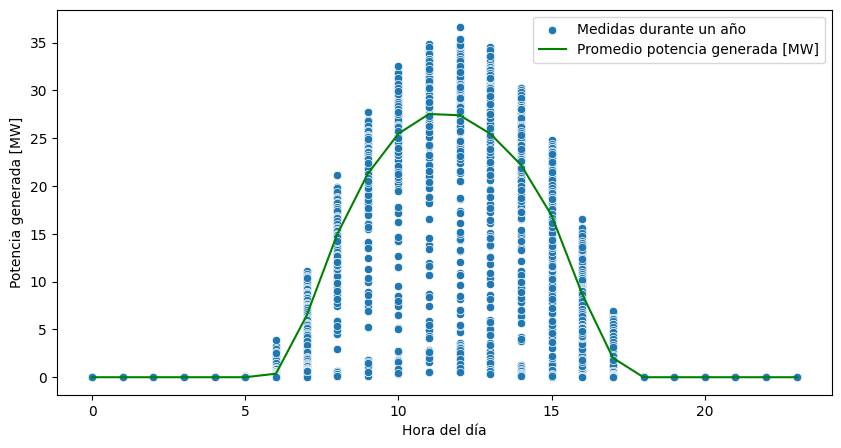

In [63]:
plt.figure(figsize=(10,5))
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean().reset_index()
sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")
sns.lineplot(promedio_generacion_hora, x="Hour", y="Power(MW)", color="g", label="Promedio potencia generada [MW]")
plt.ylabel("Potencia generada [MW]")
plt.xlabel("Hora del día")

In [8]:
data

,Year,Month,Day,Hour,Power(MW),Minute,Temperature,Clearsky GHI,DHI,Clearsky DHI,...,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
0,2006,1,1,0,0.0,30,20.5,0,0,0,...,7,0,95.57,936,1.7,0.0000,0.0000,120.97,19.8,0.18
1,2006,1,1,1,0.0,30,20.2,0,0,0,...,6,0,96.03,935,1.9,0.0000,0.0000,130.11,19.5,0.18
2,2006,1,1,2,0.0,30,19.9,0,0,0,...,6,0,96.84,935,2.2,0.0000,0.0000,136.17,19.4,0.18
3,2006,1,1,3,0.0,30,19.6,0,0,0,...,7,0,97.90,934,2.4,0.0000,0.0000,137.79,19.3,0.18
4,2006,1,1,4,0.0,30,19.4,0,0,0,...,7,0,98.89,934,2.4,0.0000,0.0000,134.49,19.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2006,12,31,19,0.0,30,24.4,507,223,93,...,2,346,86.04,935,2.0,17.6351,22.5576,58.18,21.9,0.18
8756,2006,12,31,20,0.0,30,23.5,267,123,72,...,3,260,93.55,935,1.5,7.9844,10.3340,71.69,22.4,0.18
8757,2006,12,31,21,0.0,30,22.6,53,31,31,...,7,245,98.91,935,1.4,0.0000,0.0000,84.85,22.4,0.18
8758,2006,12,31,22,0.0,30,22.2,0,0,0,...,7,0,99.19,935,1.8,0.0000,0.0000,97.82,22.1,0.18


In [20]:
sns.pairplot(data, hue="Month")

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


# Análisis de la influencia de las condiciones climáticas

Análisis del mes

In [9]:
generacion_temperatura=data.groupby(["Hour", "Month", "Visibility", "Cloud coverage"])["Solar energy"].mean().reset_index()

KeyError: 'Visibility'

In [ ]:
generacion_temperatura

,Hour,Month,Visibility,Cloud coverage,Solar energy
0,1,1,0.33,1.00,0.0
1,1,1,2.27,1.00,0.0
2,1,1,2.58,1.00,0.0
3,1,1,2.98,1.00,0.0
4,1,1,3.04,0.00,0.0
...,...,...,...,...,...
7461,24,12,10.00,0.00,0.0
7462,24,12,10.00,0.11,0.0
7463,24,12,10.00,0.44,0.0
7464,24,12,10.00,0.67,0.0


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Solar energy'>

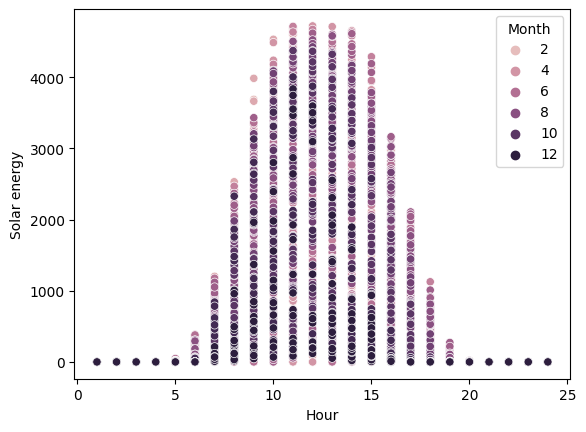

In [12]:
sns.scatterplot(generacion_temperatura, x="Hour", y= "Solar energy", hue="Month")

Al realizar un análsis de la influencia de la temperatura con la generación de energía no se nota una dependencia muy fuerte entre estas dos

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Temperature', ylabel='Solar energy'>

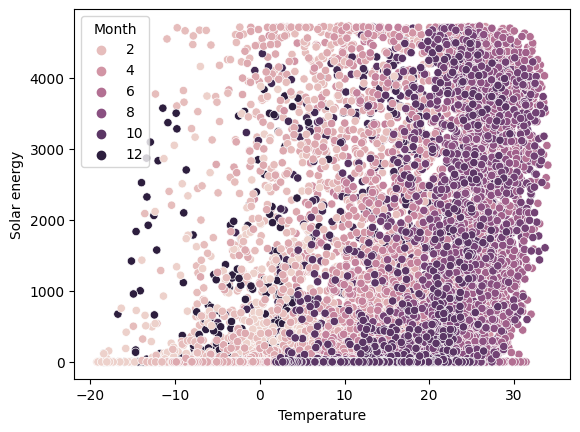

In [13]:
sns.scatterplot(data, y="Solar energy", x= "Temperature", hue="Month")

# Entrenamiento del modelo

In [25]:
data.drop(labels=["Year", "Month", "Hour", "Day"], axis=1, inplace=True)
data.set_index("Date", inplace=True)

In [30]:
data_train, data_test= train_test_split(data, test_size=0.2, shuffle=False)

In [31]:
data_train

,Power(MW),Minute,Temperature,Clearsky GHI,DHI,Clearsky DHI,Clearsky DNI,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
Date,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.0,30,20.5,0,0,0,0,7,0,95.57,936,1.7,0.0000,0.0000,120.97,19.8,0.18
2006-01-01 01:00:00,0.0,30,20.2,0,0,0,0,6,0,96.03,935,1.9,0.0000,0.0000,130.11,19.5,0.18
2006-01-01 02:00:00,0.0,30,19.9,0,0,0,0,6,0,96.84,935,2.2,0.0000,0.0000,136.17,19.4,0.18
2006-01-01 03:00:00,0.0,30,19.6,0,0,0,0,7,0,97.90,934,2.4,0.0000,0.0000,137.79,19.3,0.18
2006-01-01 04:00:00,0.0,30,19.4,0,0,0,0,7,0,98.89,934,2.4,0.0000,0.0000,134.49,19.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-10-19 19:00:00,0.0,30,25.9,365,7,85,670,9,0,74.17,932,2.6,0.2899,0.3725,65.30,20.9,0.16
2006-10-19 20:00:00,0.0,30,24.5,127,35,51,415,9,0,83.85,932,1.8,1.2723,1.6683,79.37,21.6,0.16
2006-10-19 21:00:00,0.0,30,23.3,0,0,0,0,6,0,92.22,933,1.5,0.0000,0.0000,93.42,22.0,0.16


In [34]:
scaler=StandardScaler()
data_train.iloc[:,:]= scaler.fit_transform(data_train)
data_test.iloc[:,:] = scaler.fit_transform(data_test)

In [56]:
def transform_sequence_from_dataframe(dataset, window_size, target_variable, print_df=False):
    ds=pd.DataFrame(index=range(len(dataset)))
    for cols in dataset.columns.values:
        print(cols)
        for i in range(window_size):
            ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
    ds[r"{}(t+{})".format(target_variable, i+1)]=dataset[target_variable].shift(-i-1).values
    if print_df:
        print(ds.head())
    ds.dropna(inplace=True)
    X=ds.iloc[:,:-1].to_numpy().reshape((-1, window_size, len(dataset.columns)))
    Y=ds.iloc[:,-1].to_numpy().reshape((-1,1))
    return X, Y

In [60]:
x_train, y_train=transform_sequence_from_dataframe(data_train, 10,"Temperature", print_df=True)

Power(MW)
Minute
Temperature
Clearsky GHI
DHI
Clearsky DHI
Clearsky DNI
Cloud Type
DNI
Relative Humidity
Pressure
Wind Speed
Global Horizontal UV Irradiance (295-385nm)
Global Horizontal UV Irradiance (280-400nm)
Solar Zenith Angle
Dew Point
Surface Albedo
   Power(MW)+(t+1)  Power(MW)+(t+2)  Power(MW)+(t+3)  Power(MW)+(t+4)  \
0        -0.739803        -0.739803        -0.739803        -0.739803   
1        -0.739803        -0.739803        -0.739803        -0.739803   
2        -0.739803        -0.739803        -0.739803        -0.739803   
3        -0.739803        -0.739803        -0.739803        -0.739803   
4        -0.739803        -0.739803        -0.739803        -0.739803   

   Power(MW)+(t+5)  Power(MW)+(t+6)  Power(MW)+(t+7)  Power(MW)+(t+8)  \
0        -0.739803        -0.739803        -0.739803        -0.739803   
1        -0.739803        -0.739803        -0.739803        -0.346819   
2        -0.739803        -0.739803        -0.346819        -0.722337   
3        -0.

/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

In [63]:
print(y_train)

[[-0.25335726]
 [-0.06566714]
 [ 0.14287744]
 ...
 [ 0.16373189]
 [ 0.03860515]
 [-0.00310377]]
